# [DACON] 신용카드 사용자 연체 예측 AI 경진대회
---

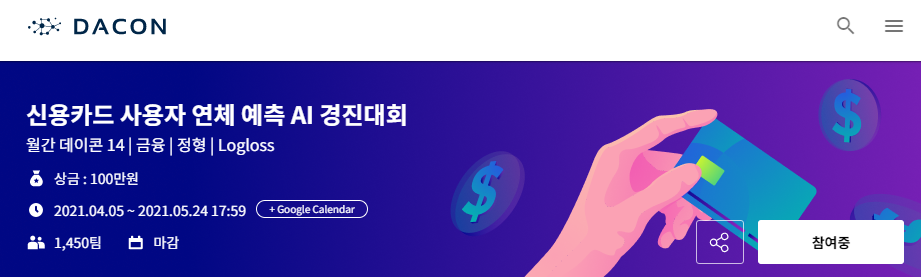

# 주제
---
- 신용카드 사용자 데이터를 보고 사용자의 대금 연체 정도를 예측하는 알고리즘 개발 

# 배경
---
- 신용카드사는 신용카드 신청자가 제출한 개인정보와 데이터를 활용해 신용 점수를 산정. 신용카드사는 이 신용 점수를 활용해 신청자의 향후 채무 불이행과 신용카드 대급 연체 가능성을 예측.


- 현재 많은 금융업계는 인공지능(AI)를 활용한 금융 서비스를 구현. 사용자의 대금 연체 정도를 예측할 수 있는 인공지능 알고리즘을 개발해 금융업계에 제안할 수 있는 인사이트를 발굴.

# 대회 설명
---
- 신용카드 사용자들의 개인 신상정보 데이터로 사용자의 신용카드 대금 연체 정도를 예측

In [40]:
import pandas as pd
import numpy as np

In [41]:
train = pd.read_csv('../data/open/train.csv')
train = train.drop(['index'], axis=1)
#train.fillna('NAN', inplace=True) 


test = pd.read_csv('../data/open/test.csv')
test = test.drop(['index'], axis=1)
#test.fillna('NAN', inplace=True)

In [42]:
# 독거노인 피처 추가

train['alone_Pensioner'] = np.where((train['income_type']=='Pensioner') & (train['family_type']=='Widow') | (train['family_type']=='Single / not married') | (train['family_type']=='Separated'), 'Yes' , 'No')
test['alone_Pensioner'] = np.where((test['income_type']=='Pensioner') & (test['family_type']=='Widow') | (test['family_type']=='Single / not married') | (test['family_type']=='Separated'), 'Yes' , 'No')

In [43]:
# 소득 구간 피처 추가, 데이터 균형을 위해 qcut 사용

train['income_class'] = pd.cut(train.income_total, 5, labels=np.arange(5))
test['income_class'] = pd.cut(train.income_total, 5, labels=np.arange(5))

In [44]:
# 나이 피쳐 추가

train['age'] = (train['DAYS_BIRTH']*-1 / 365).astype(int)
test['age'] = (test['DAYS_BIRTH']*-1 / 365).astype(int)

train['DAYS_BIRTH'] = train['DAYS_BIRTH']*-1
test['DAYS_BIRTH'] = test['DAYS_BIRTH']*-1

train['DAYS_EMPLOYED'] = train['DAYS_EMPLOYED']*-1
test['DAYS_EMPLOYED'] = test['DAYS_EMPLOYED']*-1

train['begin_month'] = train['begin_month']*-1
test['begin_month'] = test['begin_month']*-1

In [45]:
# 신혼부부 피쳐 추가 (기혼자이면서 아이가 없고 나이가 40대 미만인 그룸)

train['newly_married'] = np.where((train['family_type']=='Married') & (train['child_num']==0) & (train['age'] < 40), 'Yes' , 'No')

# 신혼부부 피쳐 추가 (기혼자이면서 아이가 없고 나이가 40대 미만인 그룸)

test['newly_married'] = np.where((test['family_type']=='Married') & (test['child_num']==0) & (test['age'] < 40), 'Yes' , 'No')

In [46]:
# OCCYP 결측치를 해당 income_type의 최빈값으로 대체

train2 = train.copy()
train2 = train2.fillna(0)
null_data = train2.loc[train2['occyp_type']==0]


test = test.fillna(0)
null_data_test = test.loc[test['occyp_type']==0]

In [47]:
null_data.loc[(null_data['DAYS_EMPLOYED'] <= 0),'occyp_type']='unemployed'

null_data.loc[(null_data['income_type']=='Pensioner'),'occyp_type']='unemployed'

null_data.loc[(null_data['income_type']=='Commercial associate'),'occyp_type']='Laborers'

null_data.loc[(null_data['income_type']=='Working'),'occyp_type']='Laborers'

null_data.loc[(null_data['income_type']=='State servant'),'occyp_type']='State servant'

null_data.loc[(null_data['income_type']=='Student'),'occyp_type']='Core staff'

train2.loc[(train2['occyp_type']== 0),'occyp_type']= null_data['occyp_type']


null_data_test.loc[(null_data_test['DAYS_EMPLOYED'] <= 0),'occyp_type']='unemployed'

null_data_test.loc[(null_data_test['income_type']=='Pensioner'),'occyp_type']='unemployed'

null_data_test.loc[(null_data_test['income_type']=='Commercial associate'),'occyp_type']='Laborers'

null_data_test.loc[(null_data_test['income_type']=='Working'),'occyp_type']='Laborers'

null_data_test.loc[(null_data_test['income_type']=='State servant'),'occyp_type']='State servant'

null_data_test.loc[(null_data_test['income_type']=='Student'),'occyp_type']='Core staff'

test.loc[(test['occyp_type']== 0),'occyp_type']= null_data_test['occyp_type']

train['alone_Pensioner'] = np.where((train['income_type']=='Pensioner') & (train['family_type']=='Widow') | (train['family_type']=='Single / not married') | (train['family_type']=='Separated'), 'Yes' , 'No')
test['alone_Pensioner'] = np.where((test['income_type']=='Pensioner') & (test['family_type']=='Widow') | (test['family_type']=='Single / not married') | (test['family_type']=='Separated'), 'Yes' , 'No')

In [48]:
# 원핫 인코딩, 레이블 인코딩 진행

train2['gender'] = train2['gender'].astype('category').cat.codes
train2['car'] = train2['car'].astype('category').cat.codes
train2['reality'] = train2['reality'].astype('category').cat.codes
train2['newly_married'] = train2['newly_married'].astype('category').cat.codes
train2['edu_type'] = train2['edu_type'].astype('category').cat.codes
train2['alone_Pensioner'] = train2['alone_Pensioner'].astype('category').cat.codes

train2 = pd.get_dummies(train2, columns=['income_type', 'family_type', 'house_type', 'occyp_type'])

test['gender'] = test['gender'].astype('category').cat.codes
test['car'] = test['car'].astype('category').cat.codes
test['reality'] = test['reality'].astype('category').cat.codes
test['newly_married'] = test['newly_married'].astype('category').cat.codes
test['edu_type'] = test['edu_type'].astype('category').cat.codes
test['alone_Pensioner'] = test['alone_Pensioner'].astype('category').cat.codes

test = pd.get_dummies(test, columns=['income_type', 'family_type', 'house_type', 'occyp_type'])

In [49]:
# 학습에 사용할 피처와 레이블 분리

features = train2[['gender', 'car', 'reality', 'child_num', 'income_total', 'edu_type',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone',
       'email', 'family_size', 'begin_month', 'alone_Pensioner',
       'income_class', 'age', 'newly_married',
       'income_type_Commercial associate', 'income_type_Pensioner',
       'income_type_State servant', 'income_type_Student',
       'income_type_Working', 'family_type_Civil marriage',
       'family_type_Married', 'family_type_Separated',
       'family_type_Single / not married', 'family_type_Widow',
       'house_type_Co-op apartment', 'house_type_House / apartment',
       'house_type_Municipal apartment', 'house_type_Office apartment',
       'house_type_Rented apartment', 'house_type_With parents',
       'occyp_type_Accountants', 'occyp_type_Cleaning staff',
       'occyp_type_Cooking staff', 'occyp_type_Core staff',
       'occyp_type_Drivers', 'occyp_type_HR staff',
       'occyp_type_High skill tech staff', 'occyp_type_IT staff',
       'occyp_type_Laborers', 'occyp_type_Low-skill Laborers',
       'occyp_type_Managers', 'occyp_type_Medicine staff',
       'occyp_type_Private service staff', 'occyp_type_Realty agents',
       'occyp_type_Sales staff', 'occyp_type_Secretaries',
       'occyp_type_Security staff', 'occyp_type_State servant',
       'occyp_type_Waiters/barmen staff', 'occyp_type_unemployed']]
label = train2[['credit']]

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2)

In [51]:
# 분류 알고리즘으로 LGBM을 선택 5 FOLD로 나누어 학습
# 모델 파라미터는 그리드서치를 이용해 튜닝

from sklearn.model_selection import StratifiedKFold
from lightgbm import LGBMClassifier

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
folds=[]
for train_idx, valid_idx in skf.split(train2, train2['credit']):
    folds.append((train_idx, valid_idx))
    
from lightgbm import LGBMClassifier

lgb_models={}
for fold in range(5):
    print(f'===================================={fold+1}============================================')
    train_idx, valid_idx = folds[fold]
    X_train, X_valid, y_train, y_valid = train2.drop(['credit'],axis=1).iloc[train_idx].values, train2.drop(['credit'],axis=1).iloc[valid_idx].values,\
                                         train2['credit'][train_idx].values, train2['credit'][valid_idx].values 
    
    lgb = LGBMClassifier(colsample_bytree=0.6, learning_rate=0.03, max_depth=15,
               n_estimators=500, num_iterations=1500, num_leaves=50,
               subsample=0.6)
    
    lgb.fit(X_train, y_train, 
            eval_set=[(X_train, y_train), (X_valid, y_valid)], 
            early_stopping_rounds=100,
           verbose=100)
    lgb_models[fold]=lgb
    print(f'================================================================================\n\n')

====================================1============================================
Training until validation scores don't improve for 100 rounds
[100]	training's multi_logloss: 0.719723	valid_1's multi_logloss: 0.77284
[200]	training's multi_logloss: 0.664035	valid_1's multi_logloss: 0.753861
[300]	training's multi_logloss: 0.619652	valid_1's multi_logloss: 0.741255
[400]	training's multi_logloss: 0.582953	valid_1's multi_logloss: 0.733081
[500]	training's multi_logloss: 0.552083	valid_1's multi_logloss: 0.727581
[600]	training's multi_logloss: 0.52585	valid_1's multi_logloss: 0.722804
[700]	training's multi_logloss: 0.500964	valid_1's multi_logloss: 0.719583
[800]	training's multi_logloss: 0.478618	valid_1's multi_logloss: 0.716439
[900]	training's multi_logloss: 0.458386	valid_1's multi_logloss: 0.714844
[1000]	training's multi_logloss: 0.440267	valid_1's multi_logloss: 0.714348
[1100]	training's multi_logloss: 0.42268	valid_1's multi_logloss: 0.713716
Early stopping, best iteration i

submit = pd.read_csv('../data/open/sample_submission.csv')

submit.iloc[:,1:]=0
for fold in range(5):
    submit.iloc[:,1:] += lgb_models[fold].predict_proba(test)/5
    
submit.to_csv('../data/open/0506_1_동현.csv', index=False)

submit.head(20)

---

`결과 LOGLOSS`

**PUBLIC : 0.71844**
    
**PRIVATE : 0.69272**

**PRIVATE  267/714등 상위38%**